In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('/home/beans/bespoke')

from constants import *
from imports import *
from viz_utils import *
from rollout import *
from traj_utils import *

/home/beans/bespoke/constants.py:448: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  propref_aux_target['ixx'] = list(range(len(propref_aux_target))) # dumb self ix so can grab sigmoid from within this smaller df


In [2]:
run_paths = glob.glob("/home/beans/blender_membank/*/run*", recursive=True)
run_path = '/home/beans/blender_membank/dataloader_01/run_0' #random.choice(run_paths)
run_path

'/home/beans/blender_membank/dataloader_01/run_0'

In [3]:
from loaders import RunLoader

In [4]:
%%time
run = RunLoader(run_path, is_rw=False)

CPU times: user 18.2 s, sys: 6.85 s, total: 25 s
Wall time: 27.3 s


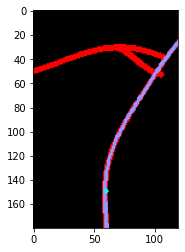

In [5]:
ix = 100
plt.imshow(run.maps[ix])

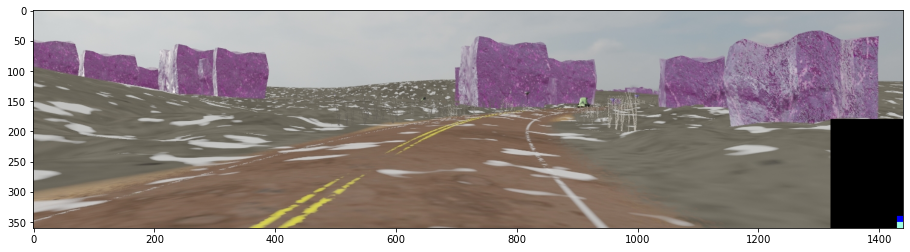

In [6]:
plt.figure(figsize=(20,4))
plt.imshow(run.img_chunk[0, ix, :,:,:3])

In [31]:
write_vid(run.img_chunk[0,:,:,:,:3], 'vid2')

KeyboardInterrupt: 

In [ ]:
# steer
plt.figure(figsize=(20,2))
plt.plot(run.aux_chunk[0,:,'tire_angle'])

In [ ]:
plt.figure(figsize=(20,2))
plt.plot(run.aux_chunk[0,:,'speed'])

In [ ]:
list(EPISODE_PROPS)

In [16]:
%%time
rollout = Rollout(run, "1.18_e21")

0
loader is done
Rollout complete!
CPU times: user 27.4 s, sys: 3.44 s, total: 30.8 s
Wall time: 20.2 s


In [14]:
run.bptt = 64

In [15]:
run.reset()

In [ ]:
rollout.wps.shape

In [ ]:
calc_rollout_results(rollout)
flatten_rollout(rollout)

In [ ]:
plt.figure(figsize=(20,2))
plt.plot(rollout.wps[:,0])
plt.plot(rollout.wps_p[:,0])

In [33]:
np.isnan(rollout.final_acts).sum()

1278

In [37]:
np.isnan(rollout.final_acts[0,:]).sum()

1

In [32]:
rollout.final_acts.shape

(1278, 1792)

In [38]:
m.train

NameError: name 'm' is not defined

In [10]:
%%time
rollout.assemble_frames()

Done assembling rollout frames!
CPU times: user 1min 2s, sys: 25.8 s, total: 1min 28s
Wall time: 28 s


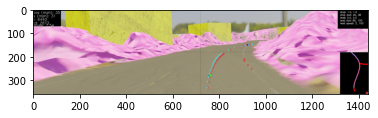

In [11]:
plt.imshow(rollout.img_rollout[10])

In [12]:
%%time
write_vid(rollout.img_rollout, f"{rollout.run_id}_{rollout.model_stem}")

sim_12.30_avg done!
CPU times: user 8.22 s, sys: 101 ms, total: 8.33 s
Wall time: 8.35 s


In [15]:
%%time
rollout_f = f"{BESPOKE_ROOT}/tmp/{run.run_id}_{rollout.model_stem}_rollout.pkl"
run_f = f"{BESPOKE_ROOT}/tmp/{run.run_id}_run.pkl"
save_object(rollout, rollout_f)

CPU times: user 7.07 s, sys: 1.79 s, total: 8.86 s
Wall time: 9.24 s


In [15]:
%%time
run = load_object(run_f)

CPU times: user 326 µs, sys: 1 s, total: 1 s
Wall time: 1 s


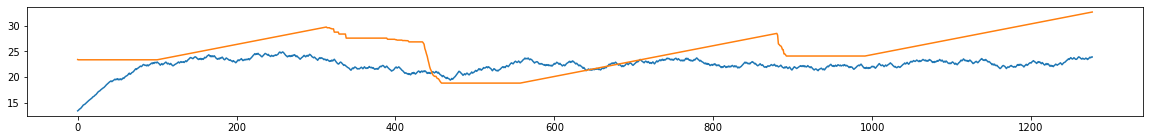

In [16]:
plt.figure(figsize=(20,2))
plt.plot(rollout.speed_mps)
plt.plot(rollout.ccs)

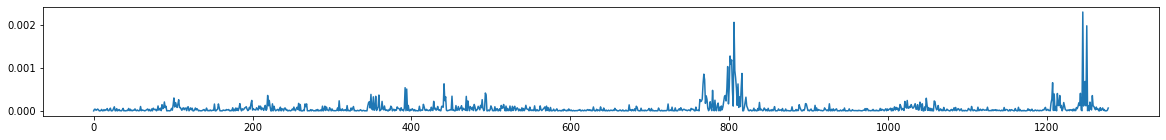

In [16]:
plt.figure(figsize=(20,2))
te = rollout.te
te = rollout.te / np.clip(np.abs(rollout.run.tire_angle), .01, np.inf)
te = np.clip(te, 0, .005)
plt.plot(te)

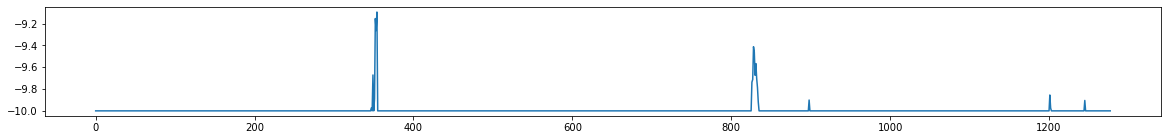

In [17]:
plt.figure(figsize=(20,2))
tl = rollout.tire_angle_loss
plt.plot(np.clip(np.log(tl), -10, 0))

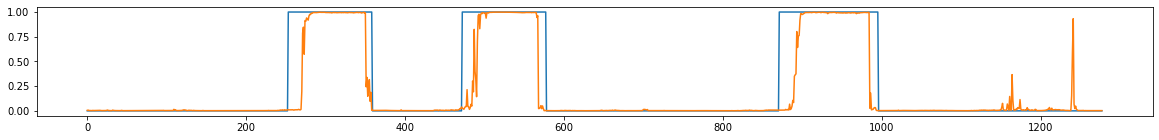

In [18]:
# Approaching stop

plt.figure(figsize=(20,2))
plt.plot(rollout.run.approaching_stop)
plt.plot(rollout.approaching_stop_p)

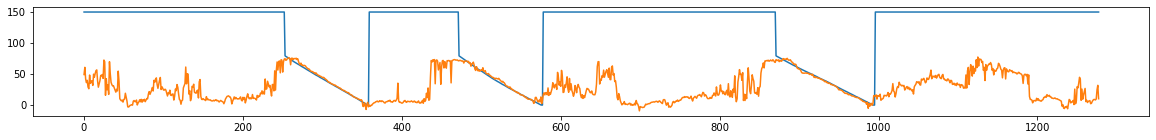

In [19]:
# stop dist
plt.figure(figsize=(20,2))
plt.plot(rollout.run.stop_dist)
plt.plot(rollout.stop_dist_p)

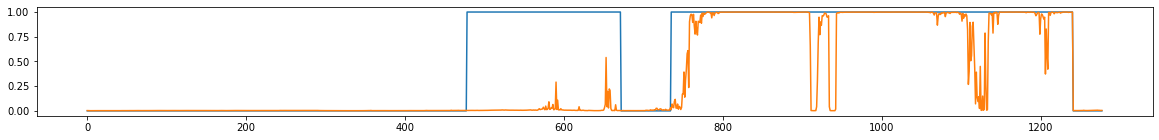

In [20]:
# has lead

plt.figure(figsize=(20,2))
plt.plot(rollout.run.has_lead)
plt.plot(rollout.has_lead_p)

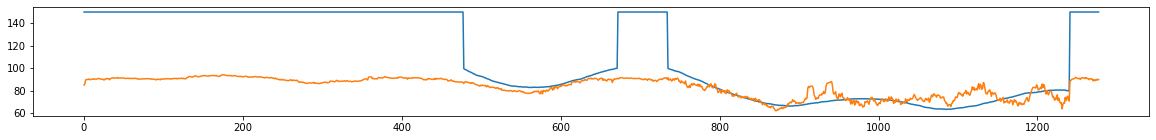

In [21]:
# lead dist

plt.figure(figsize=(20,2))
plt.plot(rollout.run.lead_dist)
plt.plot(rollout.lead_dist_p)

In [23]:
combine_vids("12.28_avg", "12.28_avg_1", "sim")

combined!


In [36]:
#p = get_viz_rollout(model_stem, imgs, aux_vid, do_gradcam=False)
#wp_angles_all, wp_headings_all, wp_curvatures_all, _, _, _, _, _ = p

In [37]:
wp_angles_all, wp_headings_all, wp_curvatures_all, obsnet_outs, cnn_activations, cnn_grads, rnn_activations, rnn_grads = rollout_data

NameError: name 'rollout_data' is not defined

(array([ 262.,  382.,  354.,  193.,  881.,  984., 1261., 1231.,  211.,
          41.]),
 array([-6.6448742e-04, -5.0002674e-04, -3.3556606e-04, -1.7110539e-04,
        -6.6447187e-06,  1.5781596e-04,  3.2227664e-04,  4.8673732e-04,
         6.5119797e-04,  8.1565866e-04,  9.8011934e-04], dtype=float32),
 <BarContainer object of 10 artists>)

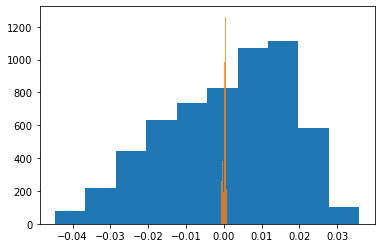

In [50]:
plt.hist(targets[:,:5].flatten())
plt.hist(wp_angles_all[:,:5].flatten(), alpha=.8)

In [22]:
obsnet_outs.shape

(1160, 3)

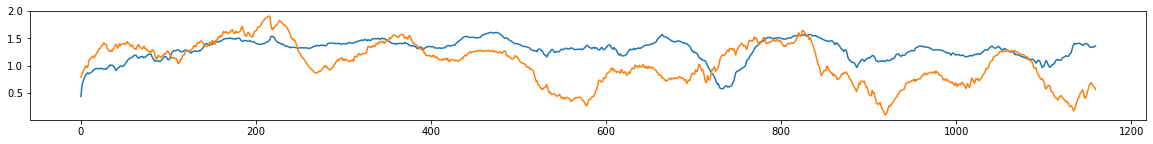

In [23]:
plt.figure(figsize=(20,2))
plt.plot(obsnet_outs[:,1])
plt.plot(obsnet_outs[:,2])

In [24]:
aux[0]

array([7.9585475e-01, 1.5869594e+00, 4.5101814e+01, 0.0000000e+00,
       3.2588083e-03], dtype=float32)